In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df: pd.DataFrame = pd.read_csv("../data/train.csv")

In [4]:
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [5]:
len(df)

1710670

In [6]:
df["TARGET"] = df["POLYLINE"].apply(lambda x : 15 * max(x.count("[") - 1, 0))

In [7]:
df["YEAR"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).year)
df["WK_OF_YR"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).isocalendar().week)
df["WK_DAY"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).weekday()) # WHY ARE YOU LIKE THIS??? ALL THE OTHERS ARE FIELDS
df["QTR_HR"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).hour + 0.25 * (datetime.fromtimestamp(x).minute // 15))

df["MONTH"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).month)
df["DAY"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).day)
df["WEEKDAY"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).weekday()) # WHY ARE YOU LIKE THIS??? ALL THE OTHERS ARE FIELDS
df["HR"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).hour)
df["MIN"] = df["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).minute)


In [8]:
mean, std = df["TARGET"].mean(), df["TARGET"].std()

In [9]:
std

684.8058607897179

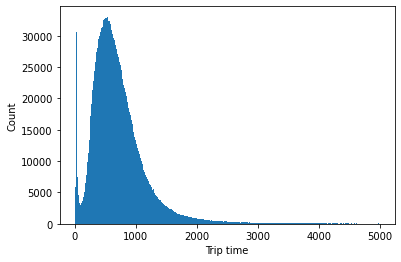

In [10]:
%matplotlib inline
plt.xlabel("Trip time")
plt.ylabel("Count")
plt.hist(df["TARGET"],bins=np.arange(start=0, stop=5000, step=15))
plt.show()

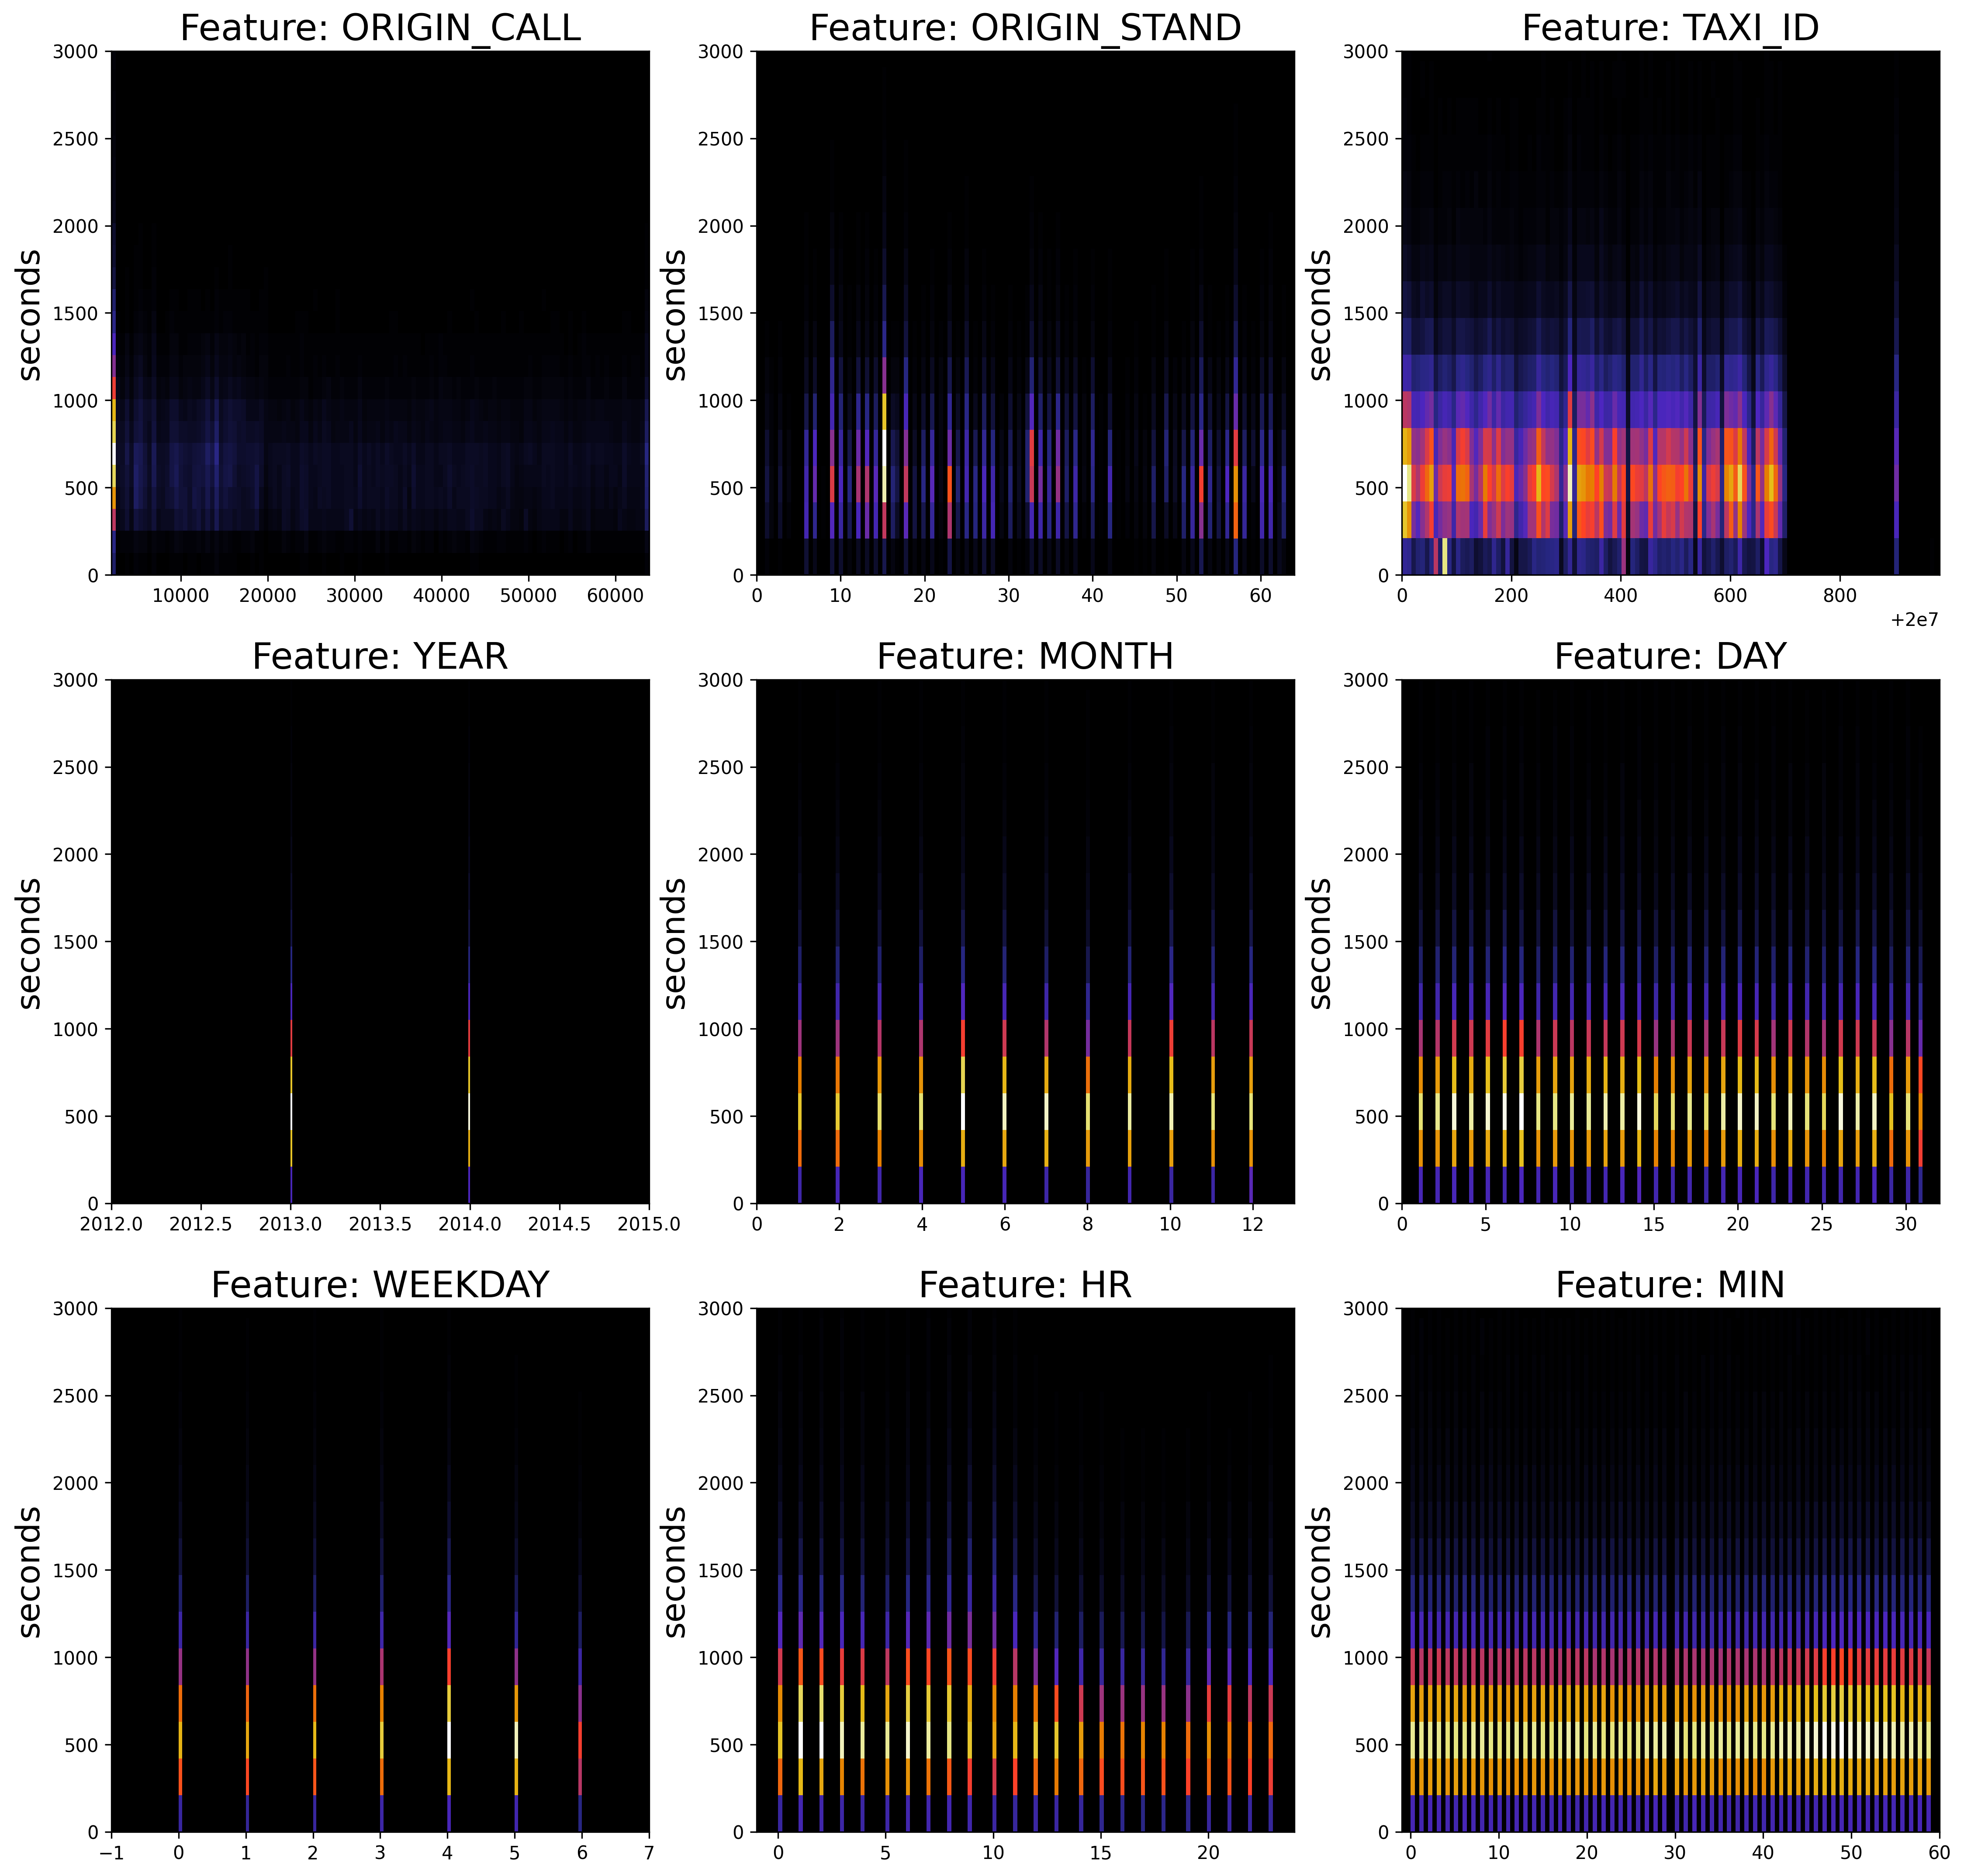

In [11]:
plt.rcParams['figure.dpi'] = 300
buckets = (int(mean + 5 * std) // 15)
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

for idx, v in enumerate(["ORIGIN_CALL", "ORIGIN_STAND", "TAXI_ID", "YEAR", "MONTH", "DAY", "WEEKDAY", "HR", "MIN"]):
    ax: plt.Axes = axs[idx // 3, idx % 3]
    df_tmp = df[np.isfinite(df[v])]
    if "ORIGIN_" in v:
        ax.hist2d(df_tmp[df_tmp[v] != 0][v][:-1], df_tmp[df_tmp[v] != 0]["TARGET"][:-1], cmap="CMRmap", bins=(120, buckets))
    else:
        ax.hist2d(df_tmp[v][:-1], df_tmp["TARGET"][:-1], cmap="CMRmap", bins=(120, buckets))

    ax.set_xlim(ax.get_xlim()[0] - 1, ax.get_xlim()[1] + 1)
    ax.set_ylim(0, 3000)
    ax.set_facecolor("black")
    ax.set_ylabel("seconds", fontsize=18)
    ax.set_title(f"Feature: {v}", fontsize=20)

plt.show()

<BarContainer object of 12 artists>

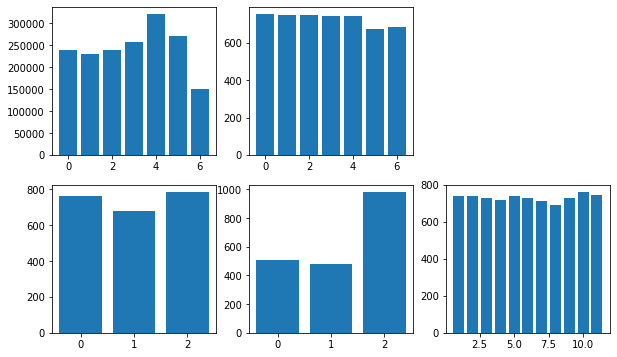

In [12]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.subplot(2, 3, 1)
plt.bar(range(0, 7), [len(df[df["WEEKDAY"] == i]) for i in range(7)])
plt.subplot(2, 3, 2)
plt.bar(range(0, 7), [df[df["WEEKDAY"] == i]["TARGET"].mean() for i in range(7)])
# plt.subplot(2, 3, 3)
# plt.bar(range(0, 448), [len(df[df["TAXI_ID"] == i]["TARGET"]) for i in range(448)])
plt.subplot(2, 3, 4)
plt.bar(range(3), [df[df["CALL_TYPE"] == "A"]["TARGET"].mean(), df[df["CALL_TYPE"] == "B"]["TARGET"].mean(), df[df["CALL_TYPE"] == "C"]["TARGET"].mean()])
plt.subplot(2, 3, 5)
plt.bar(range(3), [df[df["CALL_TYPE"] == "A"]["TARGET"].std(), df[df["CALL_TYPE"] == "B"]["TARGET"].std(), df[df["CALL_TYPE"] == "C"]["TARGET"].std()])
plt.subplot(2, 3, 6)
plt.bar(range(0, 12), [df[df["MONTH"] == i]["TARGET"].mean() for i in range(12)])

In [13]:
start_coords = np.load("start_full.npy")
end_coords = np.load("end_full.npy")

### Normal Heatmap

In [14]:
len(start_coords)
# len(df)

1710670

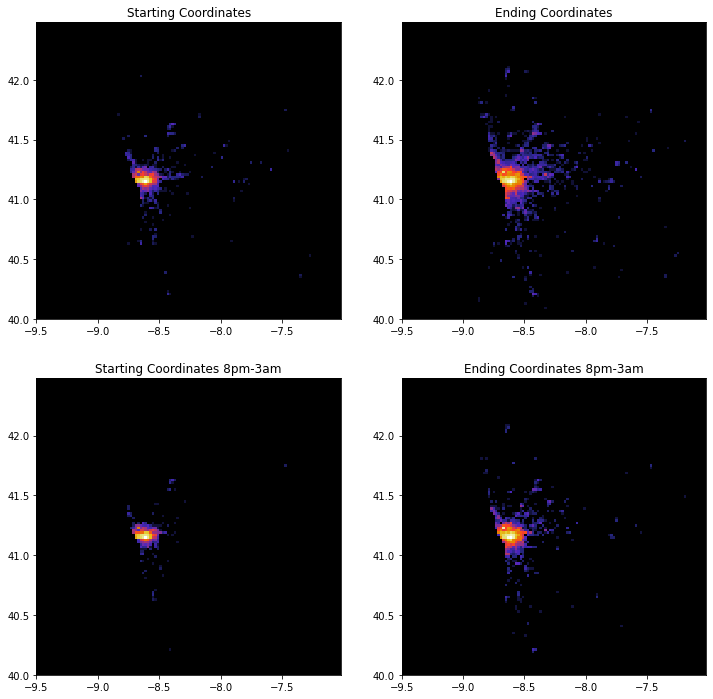

In [40]:
%matplotlib inline
from matplotlib.colors import LogNorm
fig: plt.Figure = plt.figure()
fig.set_size_inches(12, 12)
fig.tight_layout()
bucket_interval = 0.02


ax1: plt.Axes = fig.add_subplot(2, 2, 1)
ax1.set_title("Starting Coordinates")
ax1.set_facecolor("black")
ax1.hist2d(start_coords[:, 0], start_coords[:, 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(), cmap="CMRmap")

ax2: plt.Axes = fig.add_subplot(2, 2, 2)
ax2.set_title("Ending Coordinates")
ax2.set_facecolor("black")
ax2.hist2d(end_coords[:, 0], end_coords[:, 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(), cmap="CMRmap")


ax3: plt.Axes = fig.add_subplot(2, 2, 3)
ax3.set_title("Starting Coordinates 8pm-3am")
ax3.set_facecolor("black")
ax3.hist2d(start_coords[(df["HR"] > 20) | (df["HR"] < 3), 0], start_coords[(df["HR"] > 20) | (df["HR"] < 3), 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(), cmap="CMRmap")

ax4: plt.Axes = fig.add_subplot(2, 2, 4)
ax4.set_title("Ending Coordinates 8pm-3am")
ax4.set_facecolor("black")
ax4.hist2d(end_coords[(df["HR"] > 20) | (df["HR"] < 3), 0], end_coords[(df["HR"] > 20) | (df["HR"] < 3), 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(), cmap="CMRmap")

# ax3: plt.Axes = fig.add_subplot(2, 3, 5)
# ax3.set_title("Ending Coordinates after 8pm")
# ax3.set_facecolor("black")
# ax3.hist2d(end_coords[df["HR"] > 20, 0], end_coords[df["HR"] > 20, 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(), cmap="CMRmap")

plt.show()

### More detailed heatmap

In [16]:
# import folium
# from folium.plugins import HeatMap
# map_obj = folium.Map(location = [40, -7], zoom_start = 7, control_scale=True)


# HeatMap(start_coords[:, ::-1], 
#         radius=5, 
#         blur=10, 
#         min_opacity=0.1, 
#         max_opacity=0.8,
#         gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 0.8: 'red'}).add_to(map_obj)

# map_obj


In [17]:
np.mean(start_coords[:, 0])

-8.587532

In [18]:
np.mean(start_coords[:, 1])

41.015114

In [19]:
np.std(start_coords[:, 0])

0.5088997